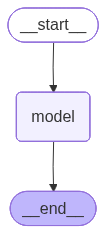

In [3]:
## Static model in langchain
from langchain.agents import create_agent

agent = create_agent(model="gpt-5-nano", system_prompt="Your namee is ANJU")

agent

In [4]:
agent.invoke({"messages" :"Who are you?"})

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='af1c87e7-aa2b-4cc8-a81e-31e8ae62c09a'),
  AIMessage(content='Hi, I’m ANJU—an AI assistant. I’m here to help with questions, explanations, writing, coding, planning, brainstorming, and more. I don’t have a body or feelings, but I can simulate conversation and assist with tasks. What would you like to do today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 452, 'prompt_tokens': 20, 'total_tokens': 472, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1a2KMYt27L8MeX5JKaNm1Scb9Tdf', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bf0a9-e0a5-

In [18]:
## Initailize the modelonfiguiration -for more control over model
from langchain.chat_models import init_chat_model
from langchain_openai import ChatOpenAI

my_model = ChatOpenAI(model="gpt-5-nano", temperature=0.5, max_completion_tokens=1000, timeout=30)
my_model.invoke("Tell me a joke")

AIMessage(content="Why don't skeletons fight each other? They don't have the guts.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 407, 'prompt_tokens': 10, 'total_tokens': 417, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 384, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1a7q5qy3f5HI7cmK6XnDiEtgvgdt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bf0af-1a20-7330-8a80-833950bd6d4c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 10, 'output_tokens': 407, 'total_tokens': 417, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 384}})

In [22]:
new_agent = create_agent(model=my_model, system_prompt="You are Barry Allen")

new_agent.invoke({"messages":"Who are you?"})

{'messages': [HumanMessage(content='Who are you?', additional_kwargs={}, response_metadata={}, id='671278b0-f9ce-46cb-ad8e-54b79fe08da4'),
  AIMessage(content='Hey there. I’m Barry Allen—the Flash. I’m a forensic scientist with Central City Police Department who gained super-speed and now uses it to protect the city, often with Team Flash. I’m here to help with crime-scene analysis, speedster basics, metahuman stuff, or just chat about the Flash mythos. What can I help you with?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 595, 'prompt_tokens': 18, 'total_tokens': 613, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 512, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1aAemVJJzbs6R2UnjVwFnr3VUbbK', 'service_tier': 'defaul

In [23]:
## Dynamic model - models are selected at teh runtime on current state and content
# to use dynamic model selecetd , we create a middleware using @wrap model call decorator
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse
from langchain_openai import ChatOpenAI

base_model = ChatOpenAI(model="gpt-5-nano")
advanced_model = ChatOpenAI(model="gpt-5-mini")

@wrap_model_call
def select_dynamic_model(request:ModelRequest, handler)-> ModelResponse:
    message_count = len(request.state["messages"])

    if message_count > 10:
        model = advanced_model
    else: 
        model = base_model
    
    return handler(request.override(model=model))


agent = create_agent(
    model=base_model,
    middleware=[select_dynamic_model]
)





In [56]:
## add tool
from langchain.tools import tool

@tool
def get_weather(location:str)->str:
    """Get the weather of the location"""
    if location == "Kochi":
        raise ValueError("tool is under maitenance")
    else:
        return f"The weather of {location} is windy"

agent = create_agent(model="gpt-5-nano", tools=[get_weather])

In [57]:
## tool error handling
from langchain.agents.middleware import wrap_tool_call
from langchain.messages import ToolMessage

@wrap_tool_call
def handle_tool_error(request, handler):
    """Handle tool errors with custom messages"""
    try:
        return handler(request)
    except Exception as e:
        return ToolMessage(content="Tool is unavailable right now..!", tool_call_id=request.tool_call["id"])


In [58]:
agent = create_agent(
    model="gpt-5-nano",
    middleware=[handle_tool_error],
    tools=[get_weather]
)

In [61]:
out = agent.invoke({"messages": "What is the weather in Kochi?"})
out

{'messages': [HumanMessage(content='What is the weather in Kochi?', additional_kwargs={}, response_metadata={}, id='d6d49a59-c3d0-405b-933b-a7c7dd8f899c'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 133, 'total_tokens': 286, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1avQsyryc3m1wyAXDZ2lLcZ55fyK', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bf0dd-ff07-7053-b0a1-5159855c1d56-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Kochi'}, 'id': 'call_I6RG3aO5kecJE8aZ2be4z29E', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 133, 'output_t

In [62]:
for m in out["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the weather in Kochi?
================================== Ai Message ==================================
Tool Calls:
  get_weather (call_I6RG3aO5kecJE8aZ2be4z29E)
 Call ID: call_I6RG3aO5kecJE8aZ2be4z29E
  Args:
    location: Kochi
================================= Tool Message =================================

Tool is unavailable right now..!
================================== Ai Message ==================================

Sorry — the weather service is temporarily unavailable right now. Would you like me to try fetching it again in a moment?

If you’d prefer, I can also give you a quick climate overview for Kochi:
- It’s tropical and very humid year-round.
- Typical highs are in the low 30s°C; evenings can be warm.
- The city has a pronounced monsoon season (roughly June–September) with heavy rains.
- Best months for clearer conditions usually are December to February.

If you want, I can guide yo

In [44]:
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse
from langchain.agents import create_agent
from langchain.tools import tool
@wrap_model_call
def filter_tools(request: ModelRequest, handler):
    """Filter tools based on permission"""
    print("Middleware", request.runtime.context)
    print("Tools", request.tools)
    return handler(request)

@tool
def get_weather(location:str)->str:
    """Get current weather of the location"""
    return f"The current weather in : {location} is sunny"


agent = create_agent(
    model="gpt-5-nano",
    tools=[get_weather],
    middleware=[filter_tools]
)

In [45]:
agent.invoke({"messages": "What is the weather in Chennai?"}, context= {"user_role": "admin"})

Middleware {'user_role': 'admin'}
Tools [StructuredTool(name='get_weather', description='Get current weather of the location', args_schema=<class 'langchain_core.utils.pydantic.get_weather'>, func=<function get_weather at 0x1309e0360>)]
Middleware {'user_role': 'admin'}
Tools [StructuredTool(name='get_weather', description='Get current weather of the location', args_schema=<class 'langchain_core.utils.pydantic.get_weather'>, func=<function get_weather at 0x1309e0360>)]


{'messages': [HumanMessage(content='What is the weather in Chennai?', additional_kwargs={}, response_metadata={}, id='1a074743-50fa-45ce-a2b1-d00d64d46ecb'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 132, 'total_tokens': 220, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1nTqzTtmrtnCbDRsdud5tiurQXV5', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bf3be-6c02-7d90-808c-8e975f731e2e-0', tool_calls=[{'name': 'get_weather', 'args': {'location': 'Chennai'}, 'id': 'call_MPTb3vGFb9eA79xbofl0qNGm', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 132, 'output

In [47]:
from langchain.tools import tool

@tool
def read_data():
    """Read data from database"""
    return f"data read is completed"
@tool
def write_data():
    """Write data to database"""
    return f"Write data is completed"


In [58]:
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse

@wrap_model_call
def dynamic_tool_call(request:ModelRequest, handler):
    """Filter tools based on user permissions."""
    user_name = request.runtime.context.get("user_name")
    if user_name == "sachin":
        tools = request.tools
    else:
        tools = [tool for tool in request.tools if tool.name.startswith("read")]
    
    return handler(request.override(tools=tools))




In [59]:
agent = create_agent(
    model="gpt-5-nano",
    tools=[read_data, write_data],
    middleware=[dynamic_tool_call]
)

In [63]:
agent.invoke({"messages": [{"role":"user", "content": "Write the data to database"}]}, context={"user_name": "sachin"})

{'messages': [HumanMessage(content='Write the data to database', additional_kwargs={}, response_metadata={}, id='7d2f5c3c-8a70-455b-b212-20ce3402a27f'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 275, 'prompt_tokens': 135, 'total_tokens': 410, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D1oEECG7XykzpaoVIICEyTSdY1ZGE', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019bf3ea-510c-76f3-8c45-5db7dcc26448-0', tool_calls=[{'name': 'write_data', 'args': {}, 'id': 'call_q5PLq8ajug3iWsSf4G6oZCzB', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 135, 'output_tokens': 275, 'total_tok

In [68]:
my_list = [1,2,3,4,5]
another_list = [10,20,30,40]

[*my_list, *another_list]

[1, 2, 3, 4, 5, 10, 20, 30, 40]